In [ ]:
### ANNOY

In [1]:
pip install annoy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp310-cp310-linux_x86_64.whl size=552450 sha256=6c190f4f3b298cba8783729f9a4729212a09ffac63d5f7ac46768eae74157783
  Stored in directory: /root/.cache/pip/wheels/64/8a/da/f714bcf46c5efdcfcac0559e63370c21abe961c48e3992465a
Successfully built annoy


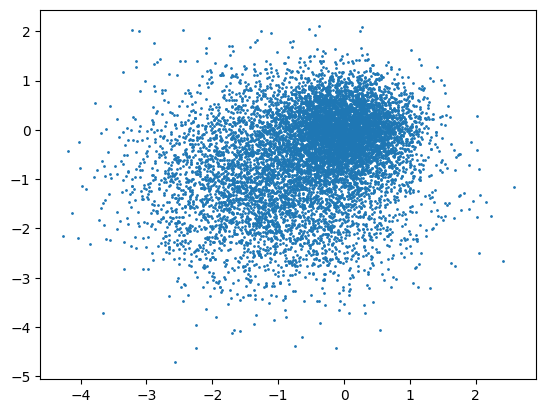

In [2]:
import numpy as np
import matplotlib.pylab as plt
from annoy import AnnoyIndex

columns = 2

vecs = np.concatenate([
    np.random.normal(-1, 1, (5000, columns)),
    np.random.normal(0, 0.5, (5000, columns)),
])

plt.scatter(vecs[:, 0], vecs[:, 1], s=1);


In [3]:
annoy = AnnoyIndex(columns, 'euclidean')
for i in range(vecs.shape[0]):
    annoy.add_item(i, vecs[i, :])
annoy.build(n_trees=1)


True

In [4]:
indices = annoy.get_nns_by_vector(np.array([0., 0.]), 20)


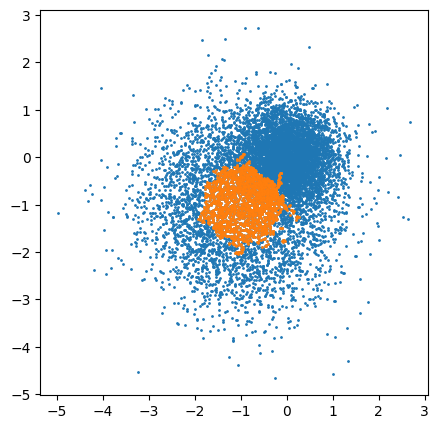

In [5]:
import numpy as np
import matplotlib.pylab as plt
from annoy import AnnoyIndex

columns = 2

vecs = np.concatenate([
    np.random.normal(-1, 1, (5000, columns)),
    np.random.normal(0, 0.5, (5000, columns)),
])

annoy = AnnoyIndex(columns, 'euclidean')
for i in range(vecs.shape[0]):
    annoy.add_item(i, vecs[i, :])
annoy.build(n_trees=1)

plt.figure(figsize=(5, 5))
plt.scatter(vecs[:, 0], vecs[:, 1], s=1);

indices = annoy.get_nns_by_vector(np.array([-1., -1.]), 2000)

subset = vecs[indices, :]
plt.scatter(subset[:, 0], subset[:, 1], s=1);


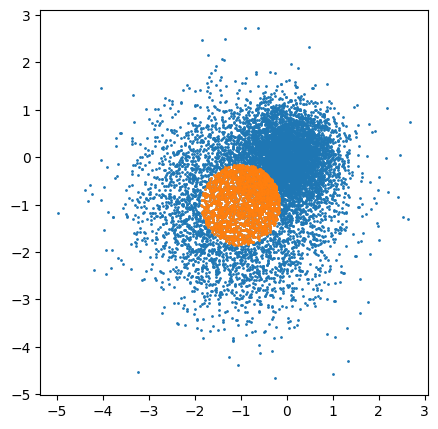

In [6]:
annoy = AnnoyIndex(columns, 'euclidean')
for i in range(vecs.shape[0]):
    annoy.add_item(i, vecs[i, :])
# this is the line that we changed from 1 -> 10
annoy.build(n_trees=10)

plt.figure(figsize=(5, 5))
plt.scatter(vecs[:, 0], vecs[:, 1], s=1);

indices = annoy.get_nns_by_vector(np.array([-1., -1.]), 2000)

subset = vecs[indices, :]
# this should now show a proper circle
plt.scatter(subset[:, 0], subset[:, 1], s=1);


In [7]:
from sklearn.neighbors import NearestNeighbors

# this is the original query
query = np.array([-2., -2.])
# scikit learn needs it to be wrapped
q = np.array([query])
# we will retreive 10 neighbors in each case
n = 10


In [8]:
nn = NearestNeighbors(n_neighbors=n, algorithm='ball_tree').fit(vecs)


In [9]:
%%timeit
distances, indices = nn.kneighbors(q)


508 µs ± 151 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
nn = NearestNeighbors(n_neighbors=n, algorithm='kd_tree').fit(vecs)


In [11]:
%%timeit
distances, indices = nn.kneighbors(q)


702 µs ± 99.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
nn = NearestNeighbors(n_neighbors=n, algorithm='brute').fit(vecs)


In [13]:
%%timeit
distances, indices = nn.kneighbors(q)


The slowest run took 4.82 times longer than the fastest. This could mean that an intermediate result is being cached.
1.12 ms ± 895 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
annoy = AnnoyIndex(columns, 'euclidean')
for i in range(vecs.shape[0]):
    annoy.add_item(i, vecs[i, :])
annoy.build(n_trees=10)


True

In [15]:
%%timeit
annoy.get_nns_by_vector(query, n)


16.1 µs ± 4.49 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [16]:
annoy = AnnoyIndex(columns, 'euclidean')
for i in range(vecs.shape[0]):
    annoy.add_item(i, vecs[i, :])
annoy.build(n_trees=1)


True

In [17]:
%%timeit
annoy.get_nns_by_vector(query, n)


2.88 µs ± 853 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [18]:
columns = 2
vecs = np.concatenate([
    np.random.normal(-1, 1, (5000, columns)),
    np.random.normal(0, 0.5, (5000, columns)),
])

metric = 'euclidean'

annoy = AnnoyIndex(columns, metric)
for i in range(vecs.shape[0]):
    annoy.add_item(i, vecs[i, :])
annoy.build(n_trees=1)

# here we save the annoy index
annoy.save('test.ann')

# next we make a new object with the same settings
annoy_from_disk = AnnoyIndex(columns, metric)
# here we load it in again
annoy_from_disk.load('test.ann')


True

In [ ]:
### lambda

In [21]:
def double(x):
    return x * 2

double(3)


6

In [22]:
triple = lambda x: x * 3
triple(3)


9

In [23]:
def double(x):
    return x * 2

def add_one(x):
    return x + 1


In [24]:
function_list = [double, add_one]


In [25]:
number = 1
for func in [add_one, double, add_one]:
    number = func(number)
    print(number)


2
4
5


In [26]:
number = 1
for func in [lambda x: x - 1, lambda x: x * 2, lambda x: x + 2]:
    number = func(number)
    print(number)


0
0
2


In [27]:
from functools import reduce

numbers = [1, 2, 3, 4, 5]

# sum via reduce
reduce(lambda x, y: x + y, numbers)
# prod via reduce
reduce(lambda x, y: x * y, numbers)


120

In [28]:
import numpy as np
import pandas as pd

df = pd.DataFrame(np.random.normal(0, 1, (10, 2)))
df.columns = ['column_a', 'column_b']
df.loc[lambda d: d['column_b'] > 0]


,column_a,column_b
0,1.109175,1.048336
3,-0.730972,0.065967
4,-2.370686,1.292674
7,-1.728471,1.852187
8,0.796202,0.488650
